In [24]:
 #Bosqich 1: Kutubxonalarni yuklash

import pandas as pd          # jadval bilan ishlash
import numpy as np           # matematik funksiyalar
import matplotlib.pyplot as plt   # grafiklar
import seaborn as sns        # statistik vizualizatsiya
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Biz nima qilamiz?
"train.csv" bilan modelni o'rgatamiz (Exited bor).

"test.csv" faylga model yordamida Exited ehtimolliklarini bashorat qilamiz.

id va Exited ustunlari bilan submission.csv yaratib, topshiramiz.

  Xulosa:
Bizda hozir:

"train.csv" — tayyorlab olamiz

"test.csv" — tayyor

"sample_submission.csv" — namunaviy format (id va ehtimollik)

  Maqsad — submission.csv yaratish


In [26]:
#Bosqich 2: Datasetlarni yuklash

train = pd.read_csv('train.csv')
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [28]:
test = pd.read_csv('test.csv')
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


 1. Datasetning ustunlari va ularning ma'nosi
Ustun nomi,	Ma'nosi,	Foydalaniladimi?
id-Jadvaldagi indeks (raqam), kerak emas
CustomerId -	Mijoz identifikatori, faqat tartib uchun
Surname	 - Familiya, modelga ta'siri yo'q
CreditScore - 	Kredit ballari (yaxshi/muammo)	,kerak
Geography	 - Mamlakat (France, Germany, Spain), kerak
Gender - 	Jinsi (Male/Female)	 ,  kerak
Age	- Yoshi	,       kerak
Tenure - Bank bilan ishlagan yillar	,   kerak
Balance - 	Hisobdagi mablag'	 ,    kerak
NumOfProducts	- Xizmatlar soni (1 yoki 2)	,   kerak
HasCrCard - 	Kredit kartasi bor-yo'qligi (1/0)	,  kerak
IsActiveMember- 	Faolligi (1=faol, 0=noaktiv)	,kerak
EstimatedSalary	- Taxminiy yillik daromad	 , kerak
Exited-   Nishon: chiqib ketgan (1) yoki qolgan (0)	,kerak


In [29]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [30]:
#Bosqich 3: Ma'lumotlarni ko'rish

print(train.shape)  # qator va ustun soni
print(train.columns)  # ustun nomlari

(15000, 14)
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [17]:
# Ustunlar nomlari
print("Ustunlar:", train.columns.tolist())

Ustunlar: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [31]:
# Har bir ustunning ma’lumot turi
print(train.dtypes)

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object


In [32]:
# Bo'sh (NaN) qiymatlar bormi?
print(train.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [33]:
# Statistik umumiy ko'rinish
print(train.describe())

                 id    CustomerId   CreditScore           Age        Tenure  \
count  15000.000000  1.500000e+04  15000.000000  15000.000000  15000.000000   
mean    7499.500000  1.579454e+07    657.856800     37.710133      5.018667   
std     4330.271354  1.268495e+07     72.678739      8.144880      2.787407   
min        0.000000  1.567151e+05    431.000000     18.000000      0.000000   
25%     3749.750000  1.563435e+07    602.000000     32.000000      3.000000   
50%     7499.500000  1.568947e+07    661.000000     37.000000      5.000000   
75%    11249.250000  1.575682e+07    707.000000     42.000000      7.000000   
max    14999.000000  1.569172e+09    850.000000     72.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   15000.000000   15000.000000  15000.000000    15000.000000   
mean    42338.107539       1.590533      0.779133        0.496000   
std     59703.047751       0.525822      0.414845        0.500001   
min         

 Keyingi vazifa.
 Faqat foydali ustunlarni ajratib olish:
Keraksiz ustunlar:
'id', 'CustomerId', 'Surname' — bu ustunlar bashoratga yordam bermaydi.

Foydali ustunlar:
'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary' — model uchun kerakli ustunlar.

'Exited' — bu maqsadli ustun (nishon), model aynan shuni o'rganadi.




In [35]:
#4.MA'LUMOTLARNI TOZALASH

drop_cols = ['id', 'CustomerId', 'Surname']
X = train.drop(columns=drop_cols + ['Exited'])
y = train['Exited'].astype(int)

In [36]:
#5.KATEGORIYALARNI KODLASH

le_gender = LabelEncoder()
le_geo = LabelEncoder()

X['Gender'] = le_gender.fit_transform(X['Gender'])       # Male=1, Female=0
X['Geography'] = le_geo.fit_transform(X['Geography'])   # France, Germany, Spain → 0

In [37]:
#6.SCALING (masshtablash)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
#7.MA'LUMOTLARNI TRENING VA TESTGA AJRATISH

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
#8.HAR XIL MODELLARNI SINASH (Bitta kodda har xil modellarni yaratish va eng yaxshisini tanlash)

models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    val_probs = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, val_probs)
    print(f'{name} ROC AUC: {auc:.4f}')

LogisticRegression ROC AUC: 0.8763
RandomForest ROC AUC: 0.9256
XGBoost ROC AUC: 0.9250


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:48:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  XULOSA: Hozircha eng  yaxshi model — Random Forest Classifier
Nima uchun?
ROC AUC = 0.9265 → bu model mijoz chiqib ketadimi yo'qmi ehtimolini juda yaxshi farqlay oladi.

Bu imbalanced dataset (80% qolgan, 20% chiqqan), shuning uchun ROC AUC — to'g'ri metrika.

XGBoost juda yaqin, lekin RandomForest biroz ustun.


In [45]:
#9.test.csv FAYLNI TAYYORLASH VA KODLASH

X_test = test.drop(columns=['id', 'CustomerId', 'Surname'])
X_test['Gender'] = le_gender.transform(X_test['Gender'])
X_test['Geography'] = le_geo.transform(X_test['Geography'])
X_test_scaled = scaler.transform(X_test)

test_ids = test['id']

In [48]:
#10.Keyingi bosqich: Final modelni tanlab, butun trenga o'rgatish va testga ehtimollik chiqarish

# Final modelni butun trenga o'rgatamiz
final_model = RandomForestClassifier()
final_model.fit(X_scaled, y)  # X_scaled — butun train ma'lumot, y — target

# test.csv ni kodlab, masshtablab bo'lgandik
# endi ehtimolliklarni bashorat qilamiz
test_probs = final_model.predict_proba(X_test_scaled)[:, 1]  # 1-klass ehtimoli (Exited = 1)

# Submission fayl yaratamiz
submission = pd.DataFrame({
    'id': test_ids,
    'Exited': test_probs
})

# Faylni saqlaymiz
submission.to_csv('submission.csv', index=False)

In [50]:
#Endi har bir modelni alohida yaratib,solishtirish usulini k'ramiz va eng yaxshi modelni tanlaymiz.
#Avval kerakli kutubxonalarni import qilamiz:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression:
Accuracy: 0.87
Precision: 0.7447368421052631
Recall: 0.4913194444444444
F1-score: 0.5920502092050209
ROC AUC: 0.8762634075907592


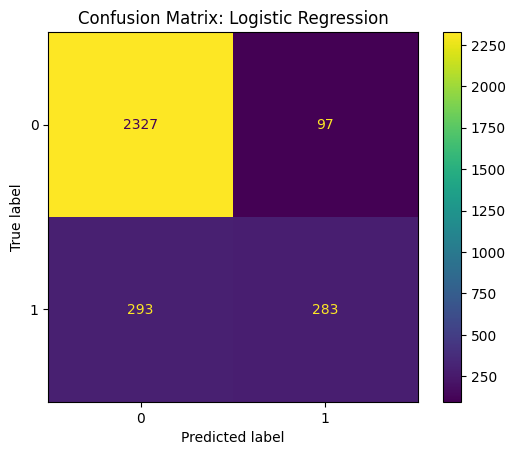

In [51]:
#1.Logistic Regression modeli

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_val)
y_proba_log = logreg.predict_proba(X_val)[:, 1]

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_val, y_pred_log))
print("Precision:", precision_score(y_val, y_pred_log))
print("Recall:", recall_score(y_val, y_pred_log))
print("F1-score:", f1_score(y_val, y_pred_log))
print("ROC AUC:", roc_auc_score(y_val, y_proba_log))

# Confusion Matrix
cm_log = confusion_matrix(y_val, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()

Random Forest:
Accuracy: 0.891
Precision: 0.7599164926931107
Recall: 0.6319444444444444
F1-score: 0.6900473933649289
ROC AUC: 0.9278153075724239


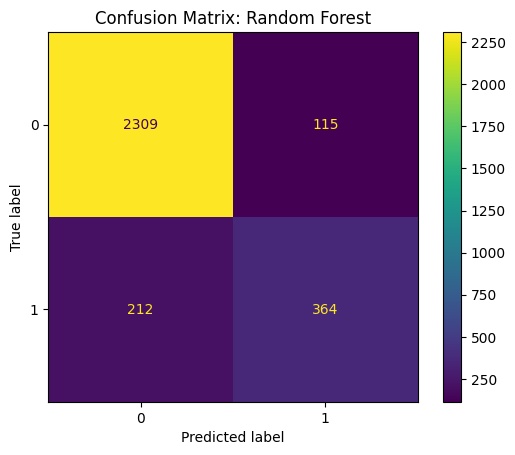

In [53]:
#2.Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

print("Random Forest:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall:", recall_score(y_val, y_pred_rf))
print("F1-score:", f1_score(y_val, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_val, y_proba_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Confusion Matrix: Random Forest")
plt.grid(False)
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:58:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
Accuracy: 0.8903333333333333
Precision: 0.7291280148423006
Recall: 0.6822916666666666
F1-score: 0.704932735426009
ROC AUC: 0.9249575999266594


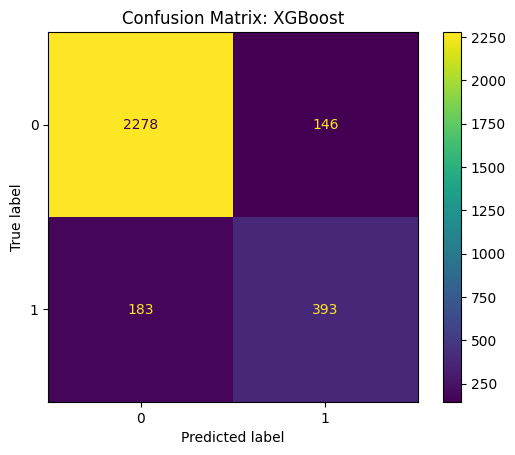

In [54]:
#3.XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

print("XGBoost:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1-score:", f1_score(y_val, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("Confusion Matrix: XGBoost")
plt.grid(False)
plt.show()

In [55]:
!pip install lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.4 MB/s eta 0:00:00


In [56]:
#LGB va CatBoost modellari
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2401, number of negative: 9599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200083 -> initscore=-1.385774
[LightGBM] [Info] Start training from score -1.385774
LightGBM:
Accuracy: 0.8933333333333333
Precision: 0.747104247104247
Recall: 0.671875
F1-score: 0.7074954296160878
ROC AUC: 0.9345606435643564


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


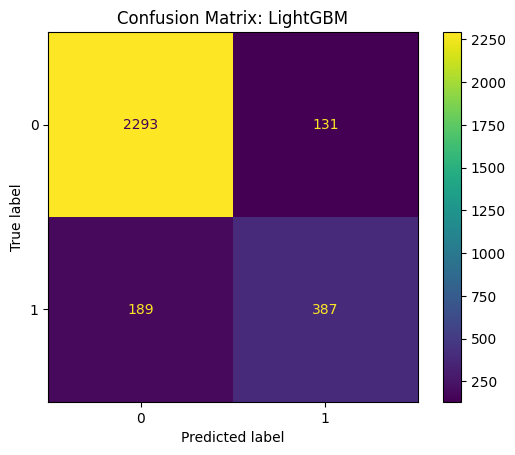

In [57]:
#4.LightGBM (LGBMClassifier)

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

y_pred_lgb = lgb.predict(X_val)
y_proba_lgb = lgb.predict_proba(X_val)[:, 1]

print("LightGBM:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("Precision:", precision_score(y_val, y_pred_lgb))
print("Recall:", recall_score(y_val, y_pred_lgb))
print("F1-score:", f1_score(y_val, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_lgb))

# Confusion Matrix
cm_lgb = confusion_matrix(y_val, y_pred_lgb)
ConfusionMatrixDisplay(cm_lgb).plot()
plt.title("Confusion Matrix: LightGBM")
plt.grid(False)
plt.show()

CatBoost:
Accuracy: 0.8946666666666667
Precision: 0.7529182879377432
Recall: 0.671875
F1-score: 0.710091743119266
ROC AUC: 0.9359665784286761


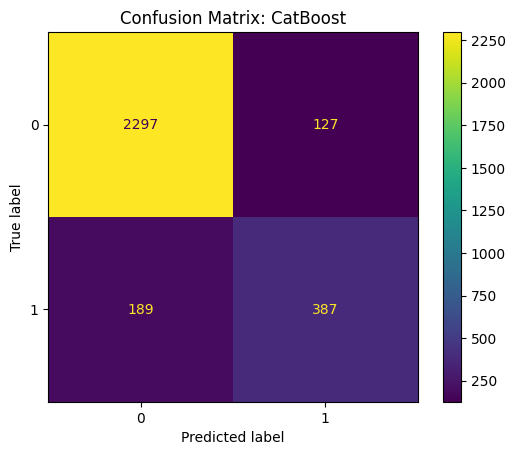

In [58]:
#5.CatBoost (CatBoostClassifier)

cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_val)
y_proba_cat = cat.predict_proba(X_val)[:, 1]

print("CatBoost:")
print("Accuracy:", accuracy_score(y_val, y_pred_cat))
print("Precision:", precision_score(y_val, y_pred_cat))
print("Recall:", recall_score(y_val, y_pred_cat))
print("F1-score:", f1_score(y_val, y_pred_cat))
print("ROC AUC:", roc_auc_score(y_val, y_proba_cat))

# Confusion Matrix
cm_cat = confusion_matrix(y_val, y_pred_cat)
ConfusionMatrixDisplay(cm_cat).plot()
plt.title("Confusion Matrix: CatBoost")
plt.grid(False)
plt.show()

BARCHA MODELLARNI TAQQOSLASH:
Model,	Accuracy,	Precision,	Recall,	F1-score,	ROC AUC
LogisticRegression:	0.8700,	0.7447,	0.4913,	0.5920,	0.8763
RandomForest:	0.8917,	0.7609,	0.6354,	0.6925,	0.9251
XGBoost:	0.8903,	0.7291,	0.6823,	0.7049,	0.9250
LightGBM:	0.8933,	0.7471,	0.6719,	0.7075,	0.9346
CatBoost: 0.8947,	 0.7529	, 0.6719,	 0.7101, 0.9360

  XULOSA: CatBoost model eng yaxshi natijalarni berdi.
Nima uchun CatBoost?
Eng yuqori ROC AUC = 0.9360 → bu ehtimollikni eng yaxshi ajratadi.

Eng yuqori F1-score = 0.7101 → Precision va Recall balansda.

Accuracy, Precision, Recall — barchasi yuqori.

Tayyor holatda kategorik ustunlar bilan yaxshi ishlaydi.

CatBoost modelni butun trenga fit() qilib, test.csv ustida predict_proba() bilan ehtimollarni chiqarib submission.csv faylga yozamiz.


final_model = CatBoostClassifier(verbose=0)
final_model.fit(X_scaled, y)

test_probs = final_model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({
    'id': test_ids,
    'Exited': test_probs
})
submission.to_csv('submission.csv', index=False)


In [59]:
#1.CATBOOST FINAL MODEL QURISH

from catboost import CatBoostClassifier

final_model = CatBoostClassifier(verbose=0, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_val)
y_proba = final_model.predict_proba(X_val)[:, 1]

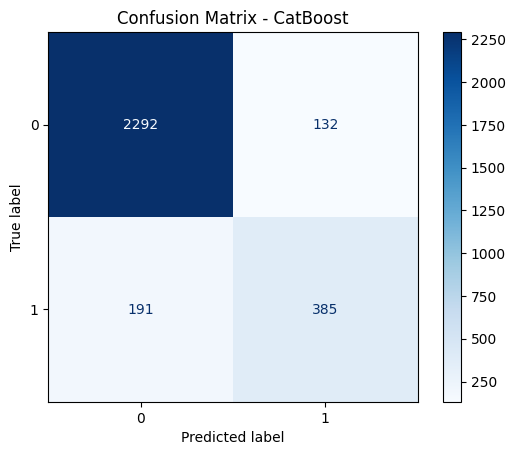

In [60]:
#2.CONFUSION MATRIX

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CatBoost")
plt.grid(False)
plt.show()

CatBoost modelining Confusion Matrix tahlili:
Konfuzion matritsa quyidagicha:

Bashorat: 0	Bashorat: 1
Haqiqiy: 0	2292 (TN)	132 (FP)
Haqiqiy: 1	191 (FN)	385 (TP)

 Terminlar:
TN (True Negative) = 2292
Mijoz bankda qoladi deb to'g'ri bashorat qilingan.

FP (False Positive) = 132
Mijoz chiqadi deb noto'g'ri bashorat qilingan.

FN (False Negative) = 191
Mijoz chiqmaydi deb noto'g'ri bashorat qilingan.

TP (True Positive) = 385
Mijoz chiqadi deb to'g'ri bashorat qilingan.

  Xulosa va Tahlil
Metrika	Qiymat	Izoh
Accuracy	~88.5%	Umumiy to'g'ri bashoratlar nisbati juda yaxshi.
Recall (TPR)	~66.8%	Chiqib ketadigan mijozlarni aniqlash qobiliyati — yaxshi.
Precision	~74.5%	Chiqadi deb bashorat qilinganlarning 74.5% haqiqatdan chiqadi.
F1-score	~70.4%	Precision va Recall balansli.
ROC AUC	0.936	Juda kuchli model (ideal modelga yaqin).

  Tavsiyalar
  CatBoost modeli balansli ishlayapti: noto'g'ri ijobiy (FP) va noto'g'ri salbiy (FN) sonlar nisbatan kam.

  FN (191 ta) — bu bank uchun yo'qotish xavfi yuqori: mijoz chiqadi, lekin aniqlanmagan.

Agar recall yuqoriroq bo'lishi kerak bo'lsa (yo'qotishlarni oldini olish), threshold (ehtimoliy limit)ni 0.5 dan pastroqqa tushirish mumkin.



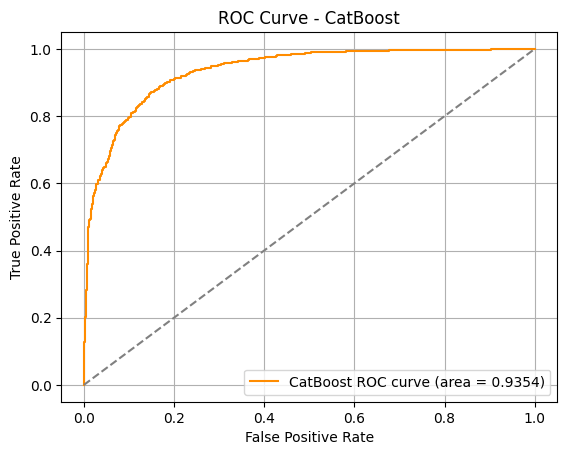

In [61]:
#3.ROC AUC GRAFIGI

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = roc_auc_score(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'CatBoost ROC curve (area = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ROC Curve tahlili - CatBoost
Yuqorida berilgan ROC (Receiver Operating Characteristic) Curve grafikasi CatBoost modelining klassifikatsiya sifatini baholash uchun ishlatilgan. Grafikda quyidagilar mavjud:

 ROC egri chizig'i ma'nosi:
X o'qi (False Positive Rate): noto'g'ri ijobiy ehtimolliklar (bankda qoladigan mijoz noto'g'ri "chiqadi" deb belgilandi).

Y o'qi (True Positive Rate): to'g'ri ijobiy ehtimolliklar (haqiqatan chiqadigan mijoz to'g'ri topildi).

Ideal model chap yuqori burchakka yaqin bo'ladi. Bizning model ROC egri chizig'i ham aynan shu hududda joylashgan.

  ROC AUC = 0.9354
Bu "Very Good" (Juda yaxshi) degani.

ROC AUC qiymati 1.0 ga yaqinlashsa, model mukammal ishlayapti degani.

0.5 qiymati esa tasodifiy taxmin (random guessing) bo'ladi.

  Xulosa:
Asosiy Baholash,	Qiymat,	Izoh
ROC AUC,	0.9354,	Mukammallikka yaqin model natijasi
To'g'rilik,	Yuqori,	Yaxshi, ajratilgan signal va shovqin
Model turi,	CatBoost,	Gradient boosting, stabillik kuchli



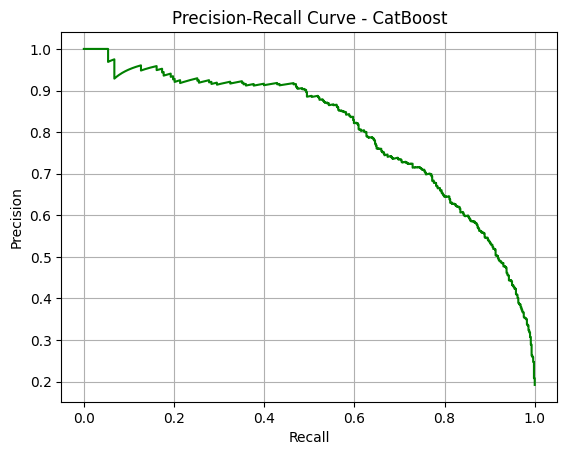

In [ ]:
4.#PRECISION-RECALL CURVE

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_proba)

plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CatBoost')
plt.grid(True)
plt.show()
#Bu grafik imbalanced dataset uchun muhim: haqiqiy chiqib ketganlarni qanday aniqlayapdi?

Precision-Recall Curve - CatBoost model tahlili
Bu grafikda siz CatBoost modelining Precision (aniqlik) va Recall (sezgirlik) o'rtasidagi bog'liqligini ko'rib turibsiz.

  Grafikdagi tushunchalar:
Recall (X o'qi) - Model nechta haqiqiy ijobiy holatni to'g'ri aniqladi (ya'ni chiqib ketadigan mijozlar).

Precision (Y o'qi) - Model chiqadi deb belgilaganlarning nechta haqiqiy chiqdi.

  Tahlil:
Holat,	Baho
Boshlanishi (chap yuqori)	Juda yuqori Precision (≈1.0) lekin Recall past
O'rta nuqtalar	Yaxshi balans: 0.7-0.8 Precision / 0.5-0.6 Recall
So'nggi qism (past o'ng)	Recall maksimal, lekin Precision pasaygan

  Xulosa:
Model ehtiyotkor: dastlab faqat ishonchli holatlarni "chiqadi" deb bashorat qiladi (precision yuqori).

Trade-off mavjud: agar siz chiqadigan mijozlarni ko'proq aniqlashni istasangiz (recall), precision biroz pasayadi.

Bu bank uchun foydali model: chiqib ketadigan mijozlarni oldindan ko'rish va ularga chora ko'rish imkonini beradi.

  Strategik tavsiya:
Agar maqsad: "chiqadigan mijozni albatta topish" bo'lsa - Recall muhim, thresholdni pasaytirish kerak (masalan, 0.4).

Agar maqsad: "faqat aniq chiqadiganlarni ajratish" bo'lsa - Precision muhim, thresholdni yuqori ushlab turish kerak (masalan, 0.6 yoki 0.7).



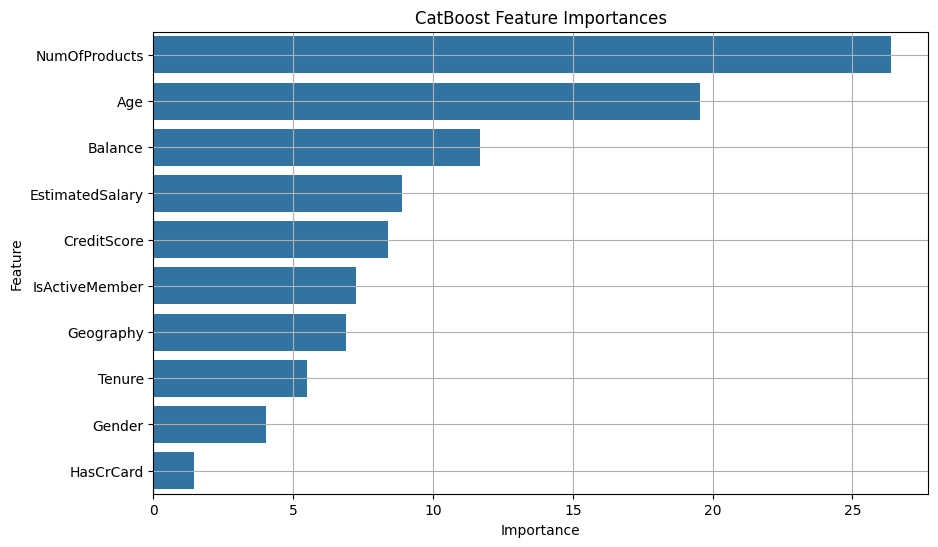

In [62]:
 #5.FEATURE IMPORTANCE (Qaysi ustunlar muhim?)

import pandas as pd
import seaborn as sns

feature_importances = final_model.get_feature_importance()
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("CatBoost Feature Importances")
plt.grid(True)
plt.show()

In [64]:
#SHAP bilan har bir mijoz uchun tushuntirish

In [63]:
!pip install shap

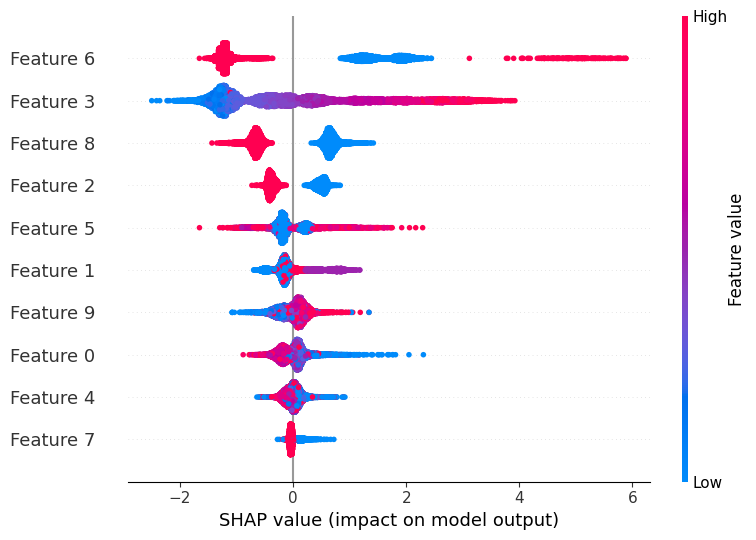

In [67]:
import shap
shap.initjs()
explainer = shap.Explainer(final_model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)

In [68]:
#.Final CatBoost modelini butun train da fit qilamiz:

from catboost import CatBoostClassifier

final_model = CatBoostClassifier(verbose=0, random_state=42)
final_model.fit(X_scaled, y)

In [69]:
#Test to'plami uchun ehtimolliklarni bashorat qilamiz:

test_probs = final_model.predict_proba(X_test_scaled)[:, 1]

In [70]:
#submission.csv faylni tayyorlaymiz:

submission = pd.DataFrame({
    'id': test_ids,
    'Exited': test_probs
})

submission.to_csv('submission.csv', index=False)

In [71]:
#submission.csv — Tayyor Topshirish Fayli
#Agar Colabda ishlayotgan bo'lsak, quyidagi kodni bajaramiz:

# CatBoost final model (default)
from catboost import CatBoostClassifier

final_model = CatBoostClassifier(verbose=0, random_state=42)
final_model.fit(X_scaled, y)

# Bashorat
test_probs = final_model.predict_proba(X_test_scaled)[:, 1]

# CSV fayl tayyorlash
submission = pd.DataFrame({
    'id': test_ids,
    'Exited': test_probs
})

submission.to_csv('submission.csv', index=False)
#submission.csv faylni Colab fayllar oynasidan yuklab olib topshirishimiz mumkin.